In [17]:
state <- read.csv(file="/Users/pbj0812/Desktop/jupyter_notebook/practical_statistics_for_data_science/data/state.csv")

In [18]:
mean(state[["Population"]])

[1] 6162876

In [20]:
# trim = 0.1 -> 각 끝에서 10% 제외
mean(state[["Population"]], trim=0.1)

[1] 4783697

In [21]:
median(state[["Population"]])

[1] 4436370

In [22]:
weighted.mean(state[["Murder.Rate"]], w=state[["Population"]])

[1] 4.445834

In [26]:
library("dplyr")
library("matrixStats")

In [27]:
weightedMedian(state[["Murder.Rate"]], w=state[["Population"]])

[1] 4.4

In [33]:
state[["Murder.Rate"]]

[1]  5.7  5.6  4.7  5.6  4.4  2.8  2.4  5.8  5.8  5.7  1.8  2.0  5.3  5.0  1.9
[16]  3.1  3.6 10.3  1.6  6.1  2.0  5.4  1.6  8.6  6.6  3.6  2.9  6.0  0.9  3.9
[31]  4.8  3.1  5.1  3.0  4.0  4.5  2.0  4.8  2.4  6.4  2.3  5.7  4.4  2.3  1.6
[46]  4.1  2.5  4.0  2.9  2.7

In [39]:
head(state)

State,Population,Murder.Rate,Abbreviation
Alabama,4779736,5.7,AL
Alaska,710231,5.6,AK
Arizona,6392017,4.7,AZ
Arkansas,2915918,5.6,AR
California,37253956,4.4,CA
Colorado,5029196,2.8,CO


In [40]:
sd(state[["Population"]])

[1] 6848235

In [41]:
IQR(state[["Population"]])

[1] 4847308

In [42]:
mad(state[["Population"]])

[1] 3849870

In [43]:
quantile(state[["Murder.Rate"]], p=c(.05, .25, .5, .75, .95))

5%   25%   50%   75%   95% 
1.600 2.425 4.000 5.550 6.510

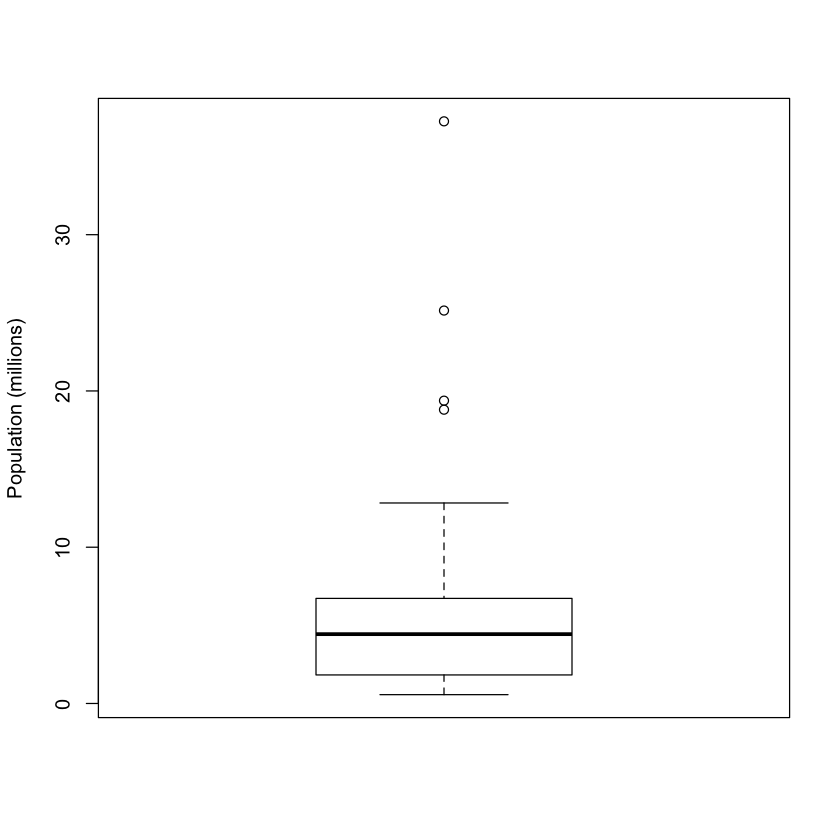

In [44]:
boxplot(state[["Population"]]/1000000, ylab="Population (millions)")

In [45]:
breaks <- seq(from=min(state[["Population"]]),
                 to=max(state[["Population"]]), length=11)
pop_freq <- cut(state[["Population"]], breaks=breaks,
                       right=TRUE, include.lowest = TRUE)
table(pop_freq)

pop_freq
[5.64e+05,4.23e+06]  (4.23e+06,7.9e+06]  (7.9e+06,1.16e+07] (1.16e+07,1.52e+07] 
                 24                  14                   6                   2 
(1.52e+07,1.89e+07] (1.89e+07,2.26e+07] (2.26e+07,2.62e+07] (2.62e+07,2.99e+07] 
                  1                   1                   1                   0 
(2.99e+07,3.36e+07] (3.36e+07,3.73e+07] 
                  0                   1 

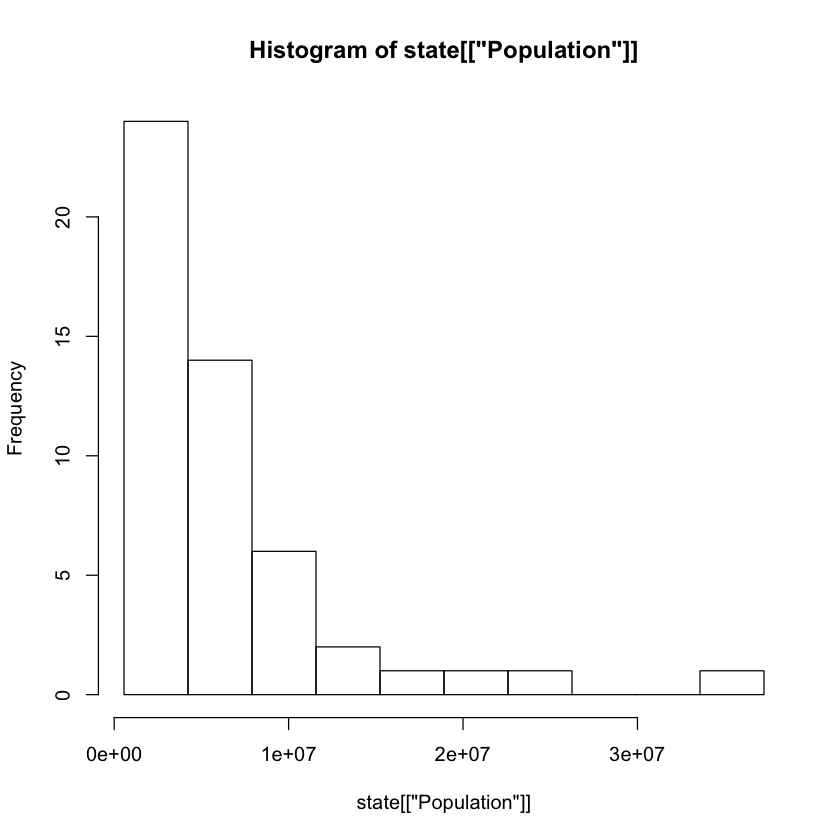

In [46]:
hist(state[["Population"]], breaks=breaks)

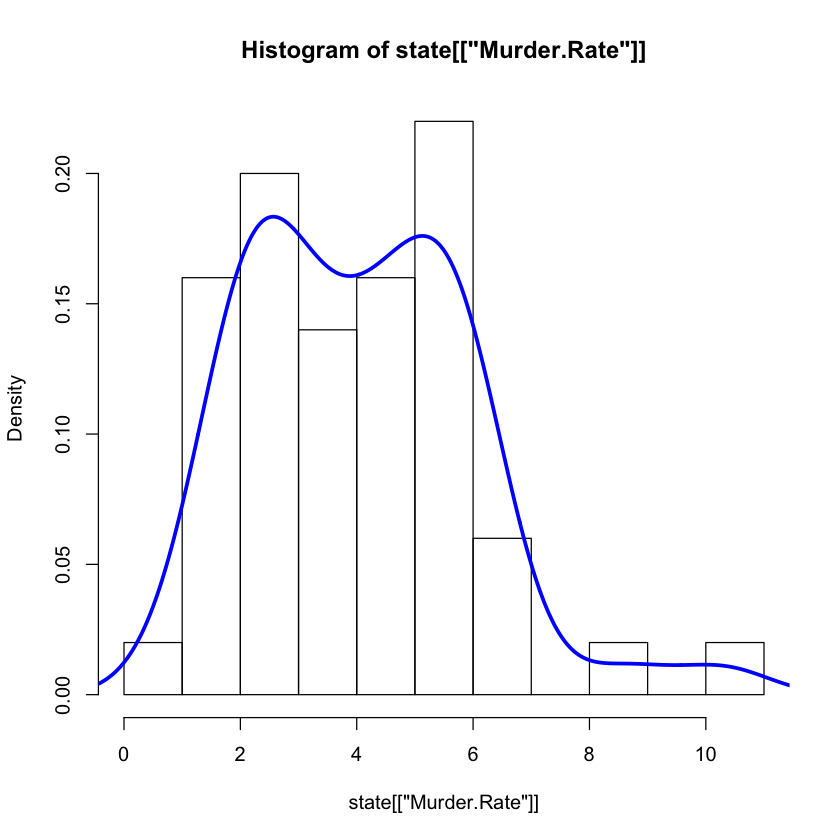

In [50]:
hist(state[["Murder.Rate"]], freq=FALSE) # freq : 비율로 할 것인지 도수로 할 것인지 결정
lines(density(state[["Murder.Rate"]]), lwd=3, col="blue")

In [52]:
dfw <- read.csv(file="/Users/pbj0812/Desktop/jupyter_notebook/practical_statistics_for_data_science/data/dfw_airline.csv")

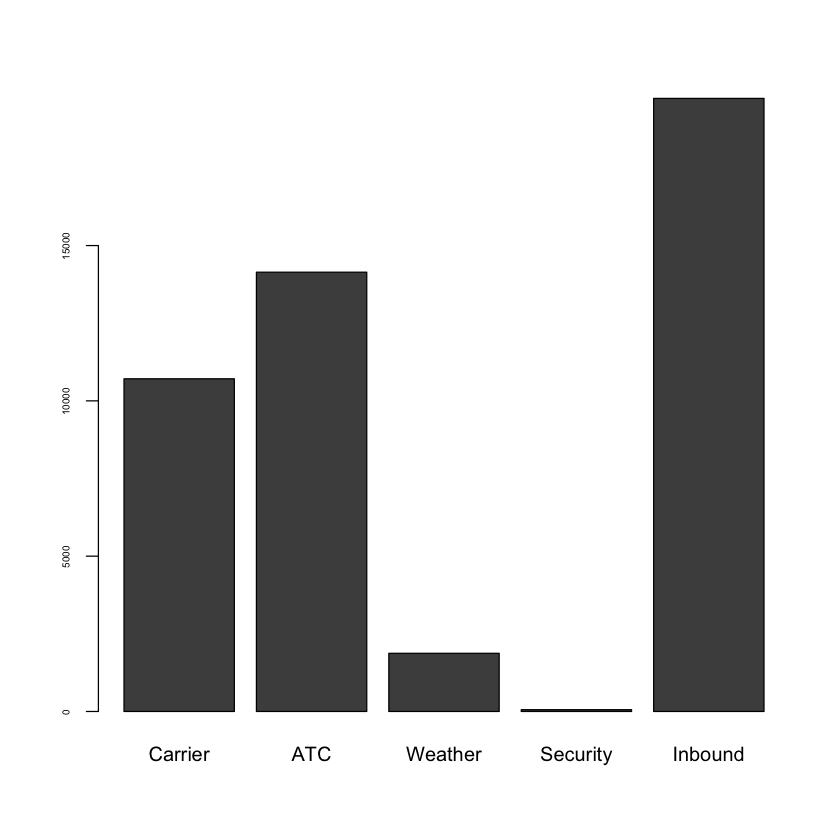

In [53]:
barplot(as.matrix(dfw)/6, cex.axis=.5)

In [54]:
dfw

Carrier,ATC,Weather,Security,Inbound
64263.16,84856.5,11235.42,343.15,118427.8


In [55]:
as.matrix(dfw)

Carrier,ATC,Weather,Security,Inbound
64263.16,84856.5,11235.42,343.15,118427.8


In [56]:
as.matrix(dfw)/6

Carrier,ATC,Weather,Security,Inbound
10710.53,14142.75,1872.57,57.19167,19737.97


In [57]:
sp500_px <- read.csv(file="/Users/pbj0812/Desktop/jupyter_notebook/practical_statistics_for_data_science/data/sp500_px.csv")
sp500_sym <- read.csv(file="/Users/pbj0812/Desktop/jupyter_notebook/practical_statistics_for_data_science/data/sp500_sym.csv")

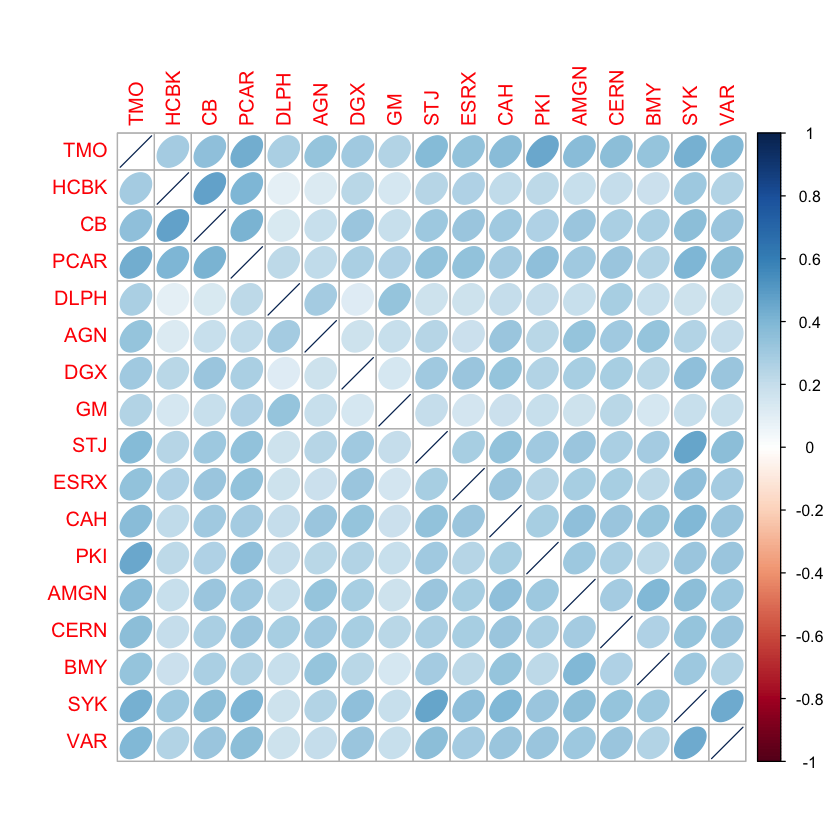

In [62]:
etfs <- sp500_px[row.names(sp500_px)>"2019-07-01",
                    sp500_sym[sp500_sym$sector=="etf", 'symbol']]
library(corrplot)
corrplot(cor(etfs), method = "ellipse")

In [63]:
plot(telecom$T, telecom$VZ, xlab="T", ylab="VZ")

ERROR: Error in plot(telecom$T, telecom$VZ, xlab = "T", ylab = "VZ"): 객체 'telecom'를 찾을 수 없습니다


In [64]:
kc_tax <- read.csv(file="/Users/pbj0812/Desktop/jupyter_notebook/practical_statistics_for_data_science/data/kc_tax.csv")

In [65]:
kc_tax0 <- subset(kc_tax, TaxAssessedValue < 750000 & SqFtTotLiving>100 & SqFtTotLiving<3500)
nrow(kc_tax0)

[1] 432693

In [66]:
head(kc_tax0)

,TaxAssessedValue,SqFtTotLiving,ZipCode
2,206000,1870,98002
3,303000,1530,98166
4,361000,2000,98108
5,459000,3150,98108
6,223000,1570,98032
7,259000,1770,98168


In [72]:
library(ggplot2)
library(stat_binhex)

ERROR: Error in library(stat_binhex): there is no package called ‘stat_binhex’


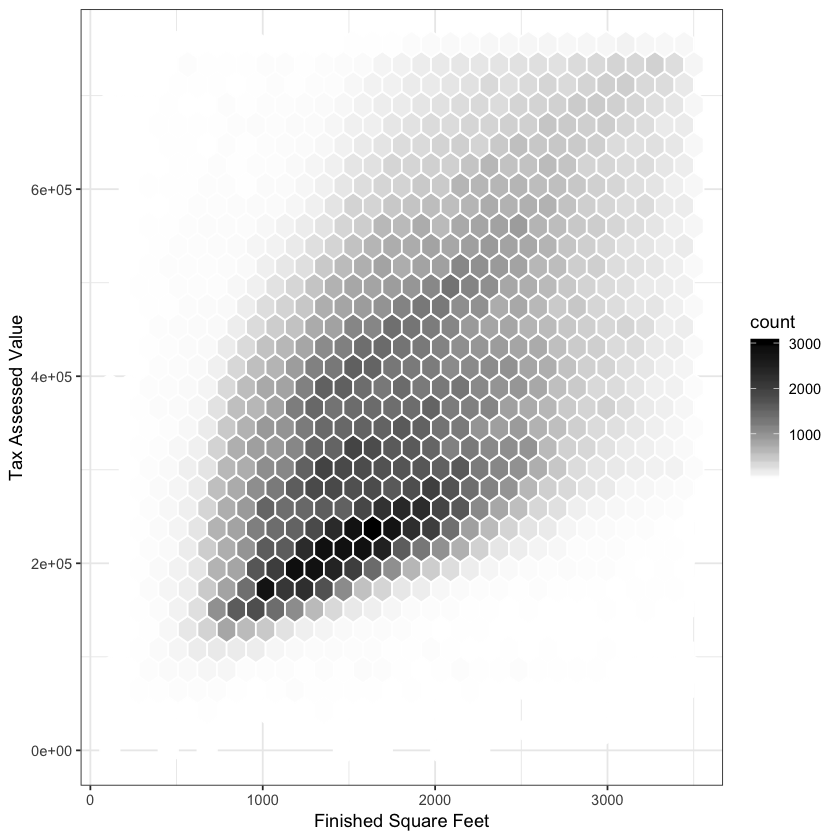

In [74]:
ggplot(kc_tax0, (aes(x=SqFtTotLiving, y=TaxAssessedValue))) +
    stat_binhex(colour="white") +
    theme_bw() +
    scale_fill_gradient(low="white", high="black") +
    labs(x="Finished Square Feet", y="Tax Assessed Value")

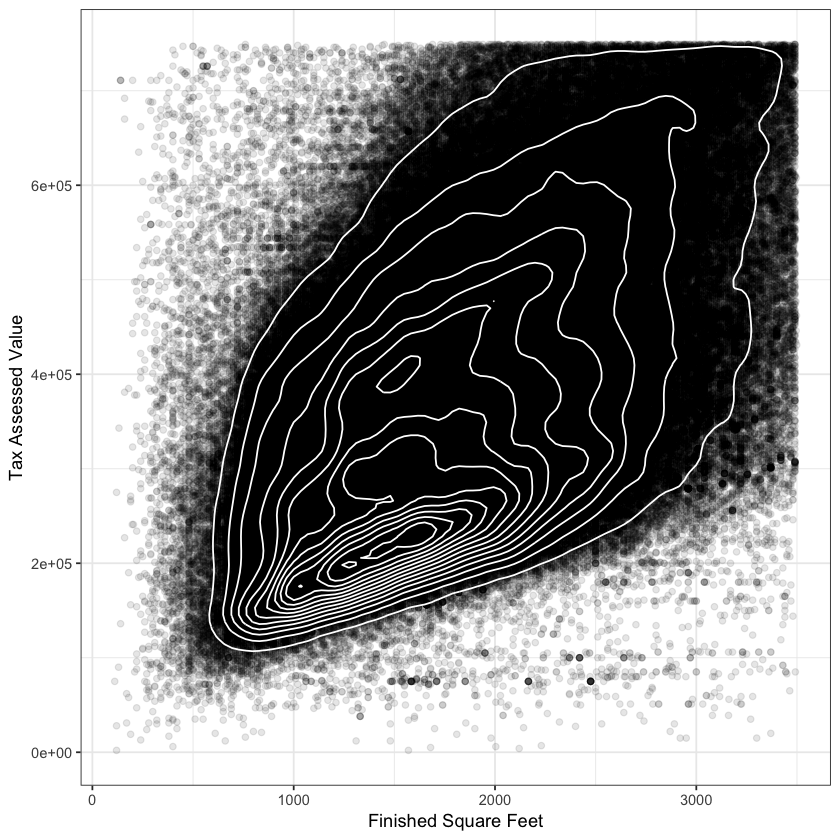

In [76]:
ggplot(kc_tax0, aes(SqFtTotLiving, TaxAssessedValue)) +
    theme_bw() +
    geom_point(alpha=0.1) +
    geom_density2d(colour="white") +
    labs(x="Finished Square Feet", y="Tax Assessed Value")

In [77]:
lc_loans <- read.csv(file="/Users/pbj0812/Desktop/jupyter_notebook/practical_statistics_for_data_science/data/lc_loans.csv")

In [78]:
library(descr)

In [79]:
x_tab <- CrossTable(lc_loans$grade, lc_loans$status,
                       prop.c=FALSE, prop.chisq=FALSE, prop.t=FALSE)

In [80]:
x_tab

   Cell Contents 
|-------------------------|
|                       N | 
|           N / Row Total | 
|-------------------------|

                  lc_loans$status
lc_loans$grade    Charged Off   Current   Fully Paid    Late    Total
---------------------------------------------------------------------
A                        1562     50051        20408     469    72490
                        0.022     0.690        0.282   0.006    0.161
---------------------------------------------------------------------
B                        5302     93852        31160    2056   132370
                        0.040     0.709        0.235   0.016    0.294
---------------------------------------------------------------------
C                        6023     88928        23147    2777   120875
                        0.050     0.736        0.191   0.023    0.268
---------------------------------------------------------------------
D                        5007     53281        13681    2308   

In [81]:
airline_stats <- read.csv(file="/Users/pbj0812/Desktop/jupyter_notebook/practical_statistics_for_data_science/data/airline_stats.csv")

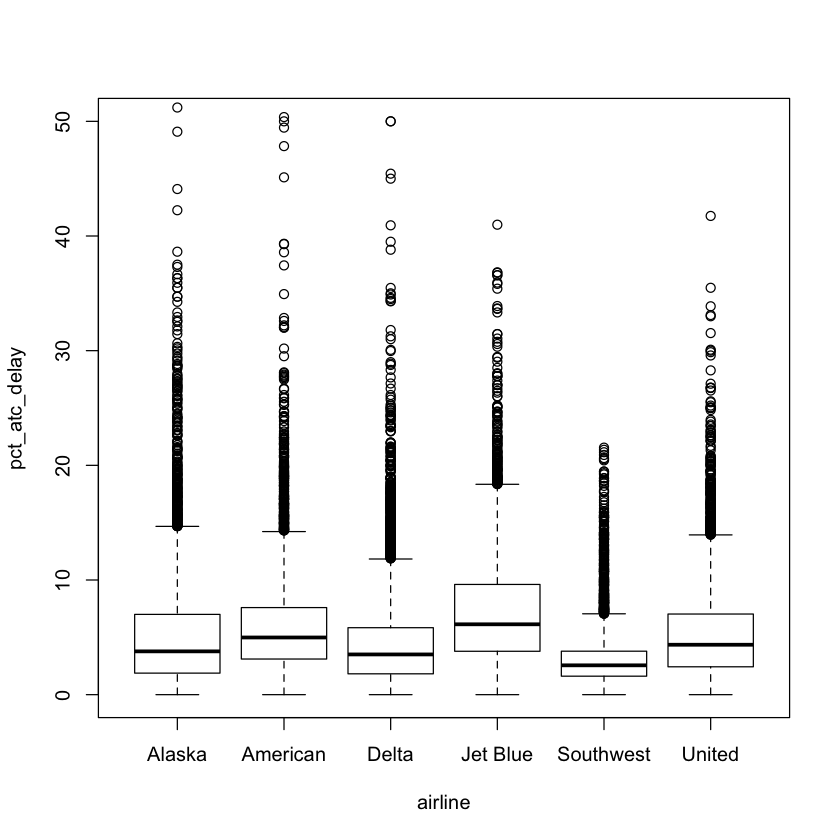

In [84]:
boxplot(pct_atc_delay ~ airline, data=airline_stats, ylim=c(0, 50))

Warning message:
“Removed 38 rows containing non-finite values (stat_ydensity).”

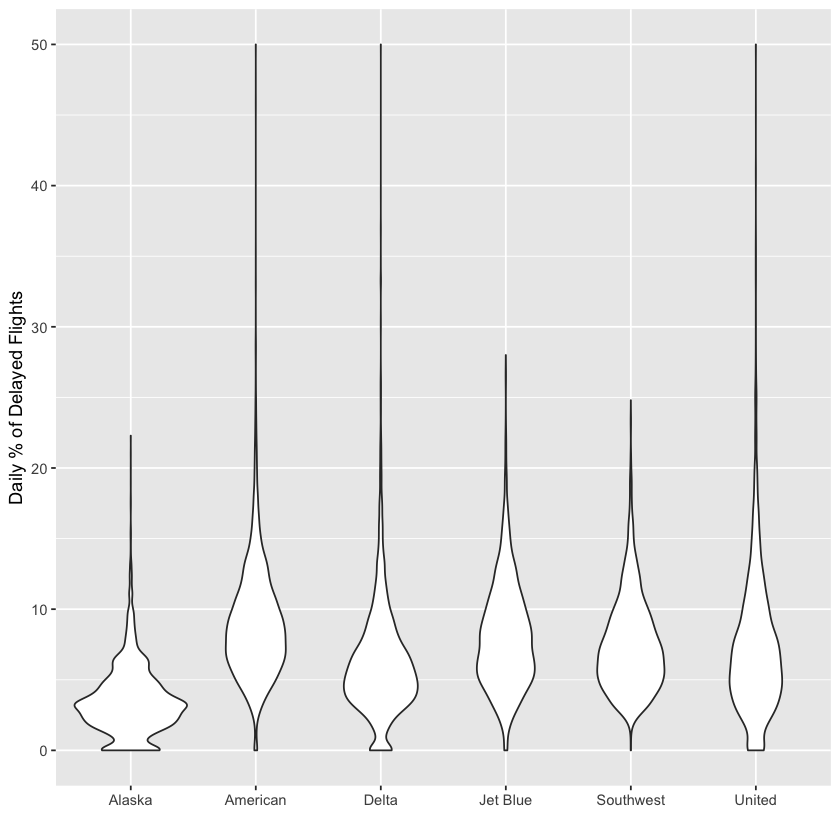

In [85]:
ggplot(data=airline_stats, aes(airline, pct_carrier_delay)) +
    ylim(0, 50) +
    geom_violin() +
    labs(x="", y="Daily % of Delayed Flights")

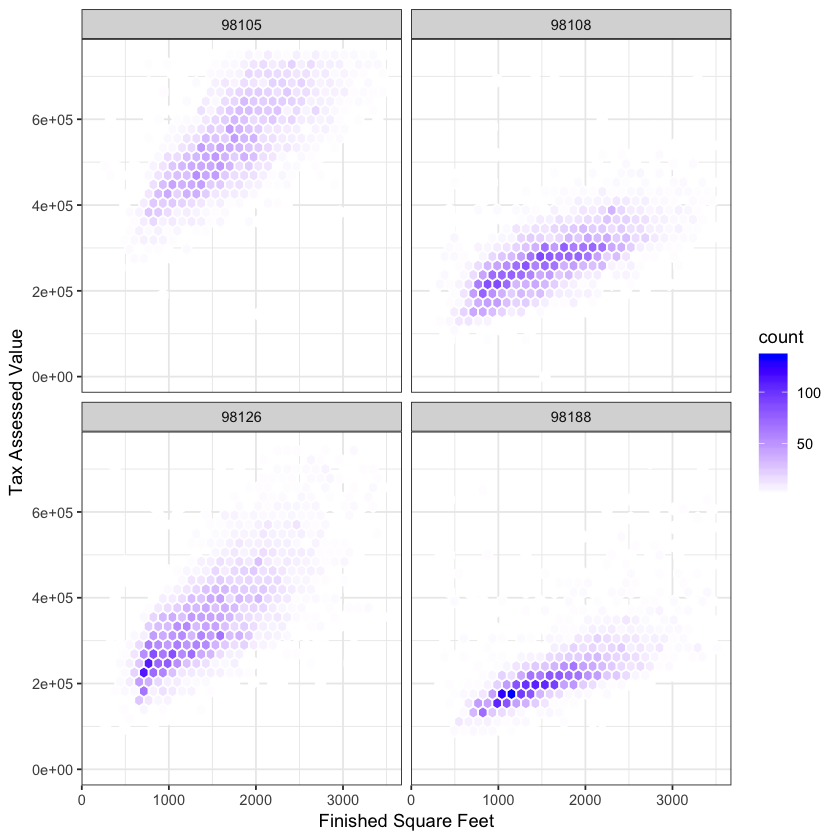

In [86]:
ggplot(subset(kc_tax0, ZipCode %in% c(98188, 98105, 98108, 98126)),
          aes(x=SqFtTotLiving, y=TaxAssessedValue)) +
    stat_binhex(colour="white") + 
    theme_bw() +
    scale_fill_gradient(low="white", high="blue") + 
    labs(x="Finished Square Feet", y="Tax Assessed Value") +
    facet_wrap("ZipCode")